In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("./data.csv")

In [36]:
print("Dataset preview:")
print(df.head())

if 'target' not in df.columns:
    raise ValueError("The dataset must contain a 'target' column representing heart failure (0 or 1).")


Dataset preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [37]:
print("\nMissing values:")
print(df.isnull().sum())

X = df.drop("target", axis=1)
y = df["target"]


Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_binary = [1 if val > 0.5 else 0 for val in y_pred]


In [39]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"\nMean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Classification Accuracy (using threshold 0.5): {accuracy:.4f}")


Mean Squared Error: 0.1163
R² Score: 0.5338
Classification Accuracy (using threshold 0.5): 0.8689


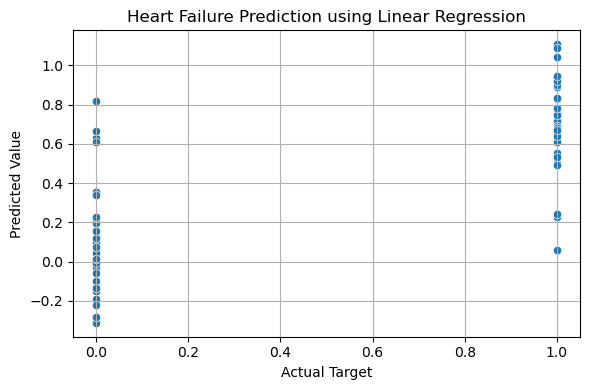

In [40]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Value")
plt.title("Heart Failure Prediction using Linear Regression")
plt.grid(True)
plt.tight_layout()
plt.show()